In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings. simplefilter(action='ignore', category=Warning) 

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler=StandardScaler()

In [4]:
import pandas as pd
path = 'C:\\Users\\swayt\\Documents\\project_ml\\feature_mean_142.csv'
data = pd.read_csv(path)

In [5]:
data_scaled=scaler.fit_transform(data)

In [6]:
from sklearn.cluster import KMeans

In [7]:
kmeans=KMeans(n_clusters=4)

In [8]:
kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [9]:
pred=kmeans.predict(data_scaled)

In [10]:
pd.Series(pred).value_counts()

0    52
3    35
2    28
1    26
dtype: int64

In [11]:
kmeans.inertia_

3571.0118743589596

In [12]:
kmeans.score(data_scaled)

-3571.0118743589596

In [13]:
SSE=[]

In [14]:
for cluster in range(1,20):
    kmeans=KMeans(n_jobs=-1,n_clusters=cluster)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

In [15]:
frame=pd.DataFrame({'Cluster':range(1,20),'SSE':SSE})

Text(0, 0.5, 'Inertia')

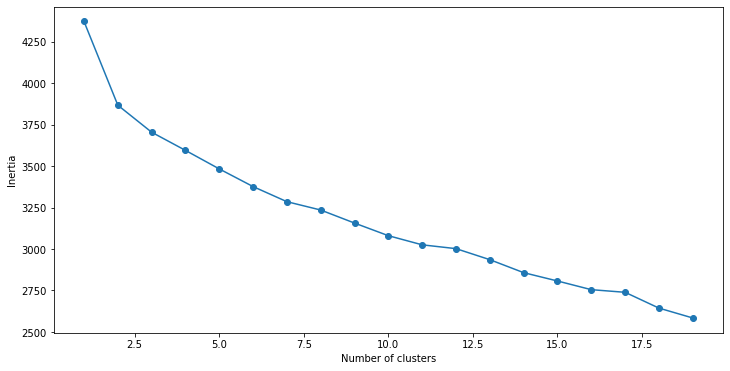

In [16]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['SSE'],marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [17]:
kmeans=KMeans(n_jobs=1,n_clusters=4)
kmeans.fit(data_scaled)
pred=kmeans.predict(data_scaled)

In [18]:
pred

array([0, 3, 1, 1, 2, 2, 0, 1, 0, 3, 0, 0, 2, 2, 2, 3, 2, 1, 0, 2, 2, 0,
       3, 1, 1, 1, 1, 0, 0, 1, 3, 3, 3, 1, 0, 1, 3, 2, 1, 0, 0, 3, 1, 0,
       0, 3, 1, 2, 2, 1, 0, 1, 0, 3, 0, 0, 0, 0, 2, 2, 3, 0, 3, 2, 2, 0,
       3, 3, 3, 1, 2, 0, 1, 2, 2, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 2, 2,
       2, 2, 1, 3, 0, 3, 0, 3, 3, 3, 3, 0, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 0, 1, 0, 1, 1, 1, 3, 0, 3, 0, 0, 0, 2, 0, 1, 3, 3, 2, 3,
       0, 1, 1, 1, 3, 2, 3, 2, 1])

In [19]:
frame=pd.DataFrame(data)

In [20]:
frame['cluster']=pred

In [21]:
frame['cluster'].value_counts()

1    39
3    35
0    35
2    32
Name: cluster, dtype: int64

In [22]:
frame.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,21,22,23,24,25,26,27,28,29,cluster
0,0,6.333333,7.666667,6.000000,3.333333,4.000000,5.333333,6.666667,5.000000,6.333333,...,6.666667,7.000000,6.333333,5.000000,4.333333,9.000000,6.333333,6.333333,6.666667,0
1,1,5.666667,4.666667,7.000000,5.000000,5.000000,2.333333,6.000000,6.000000,8.333333,...,6.333333,7.666667,5.000000,4.666667,4.000000,3.666667,7.666667,6.000000,5.666667,3
2,2,2.666667,3.666667,4.000000,5.666667,4.333333,6.333333,5.000000,6.333333,6.000000,...,4.333333,3.333333,6.666667,5.000000,5.333333,5.000000,4.333333,7.333333,6.000000,1
3,3,4.666667,6.333333,3.000000,4.666667,6.666667,4.000000,6.000000,2.666667,6.333333,...,3.666667,6.000000,2.333333,3.333333,3.333333,2.666667,3.666667,5.666667,5.000000,1
4,4,5.666667,7.000000,6.666667,6.000000,6.000000,6.333333,6.333333,5.333333,6.333333,...,5.333333,8.666667,8.000000,7.666667,7.000000,7.666667,7.333333,8.333333,9.333333,2


In [23]:
frame.to_csv('C:\\Users\\swayt\\Documents\\project_ml\\classification_mean.csv')

In [24]:
frame.iloc[140,[31]]

cluster    1.0
Name: 140, dtype: float64

In [25]:
n=int(frame.iloc[140,[31]])
print("Result : ",end="\n")
if(n==0):
    print("The patient is diagonised with Age related macular degeneration(AMD)")
elif(n==1):
    print("The patient is diagonised with Choroidal neovascularisation(CNV)")
elif(n==2):
    print("The patient is diagonised with Diabetic Retinopathy(DR)")
else:
    print("The patient is diagonised with NR")

Result : 
The patient is diagonised with Choroidal neovascularisation(CNV)


In [121]:
frame['cluster'].value_counts()

1    47
3    39
2    33
0    22
Name: cluster, dtype: int64